# ML classification algorithm to predict investor behaviour

In [111]:
# import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Access the PROJECT_PATH variable
project_path = os.getenv("PROJECT_PATH")

In [112]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [113]:
# load data

investor_data_raw = pd.read_csv(os.path.join(project_path, 'investor_data.csv'))

investor_data_raw.head(3)

,investor,commit,deal_size,invite,rating,int_rate,covenants,total_fees,fee_share,prior_tier,invite_tier
0,Goldman Sachs,Commit,300,40,2,Market,2,30,0.0,Participant,Bookrunner
1,Deutsche Bank,Decline,1200,140,2,Market,2,115,20.1,Bookrunner,Participant
2,Bank of America,Commit,900,130,3,Market,2,98,24.4,Bookrunner,Bookrunner


Algorithm aim: Predict `commit`

# Data Exploration

In [114]:
investor_data_raw.shape

(7289, 11)

In [115]:
# how does each variable influence investors to invest?
# hypothesise relationships within data

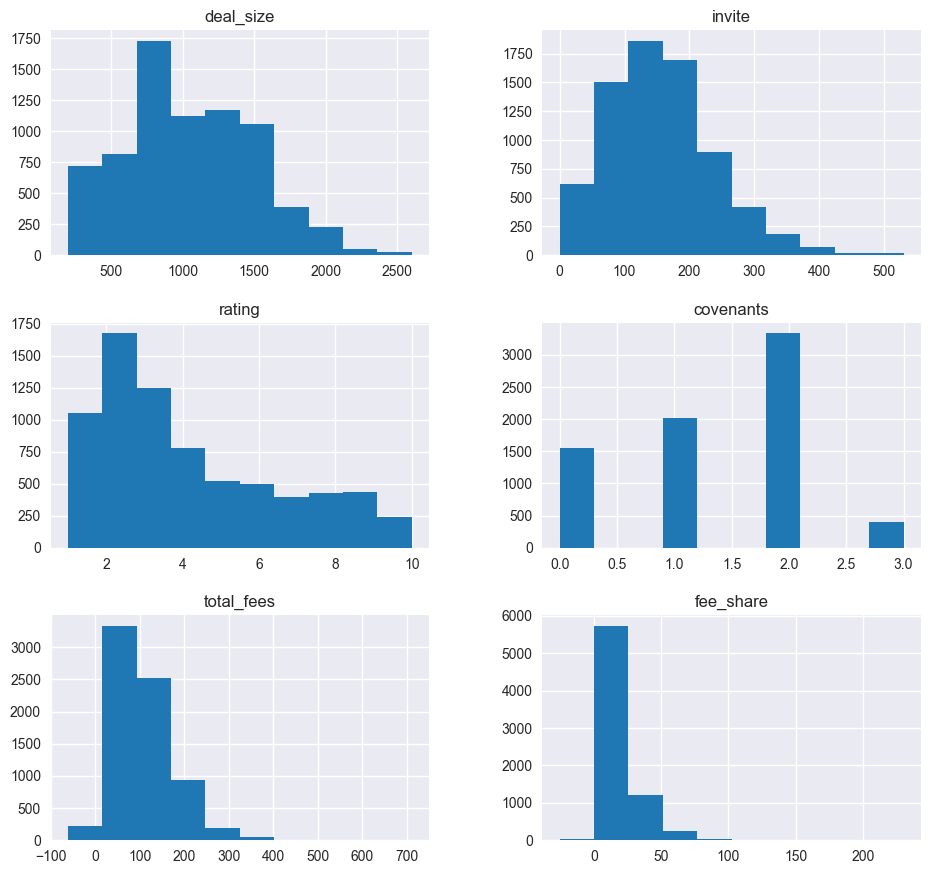

In [116]:
# create histograms for continuous variables

investor_data_raw.hist(figsize=(10,10))
plt.show()

# check for e.g. negative values e.g. 'fees' 

(7289, 11)
(7233, 11)


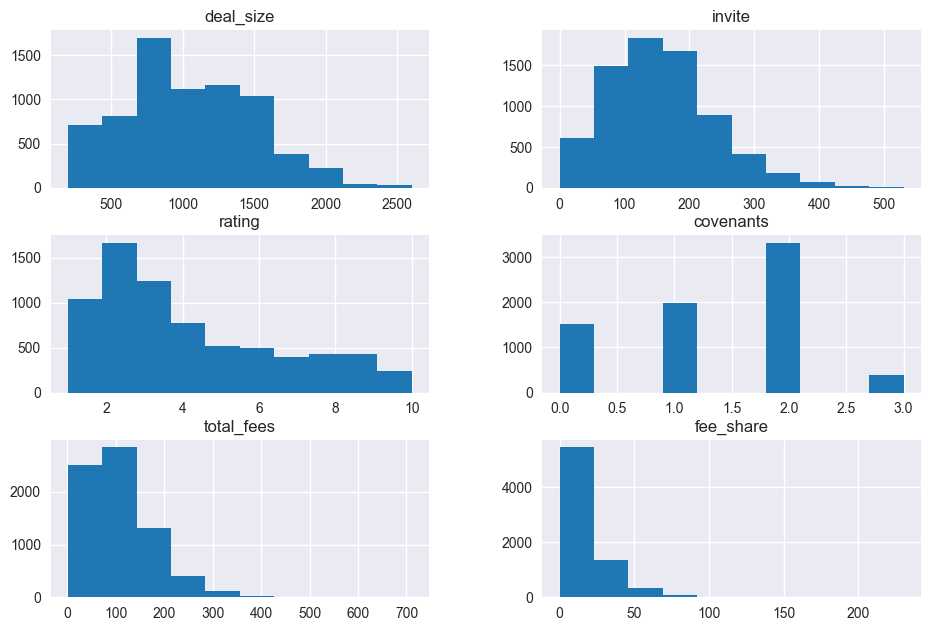

In [117]:
# remove negative fees

investor_data = investor_data_raw[investor_data_raw['total_fees'] > 0]
print(investor_data_raw.shape)
print(investor_data.shape)

# make histograms

investor_data.hist(figsize= (10,7))
plt.show()

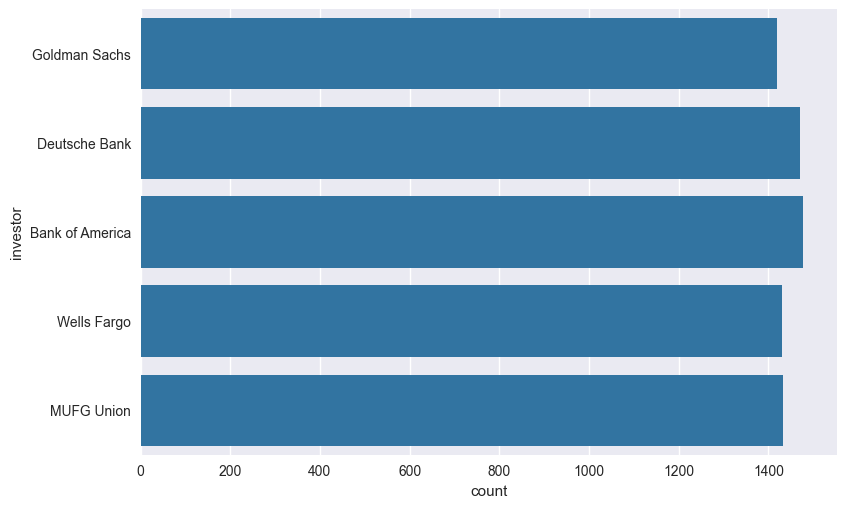

In [118]:
# countplot investor

sns.countplot(investor_data, y='investor')
plt.show()

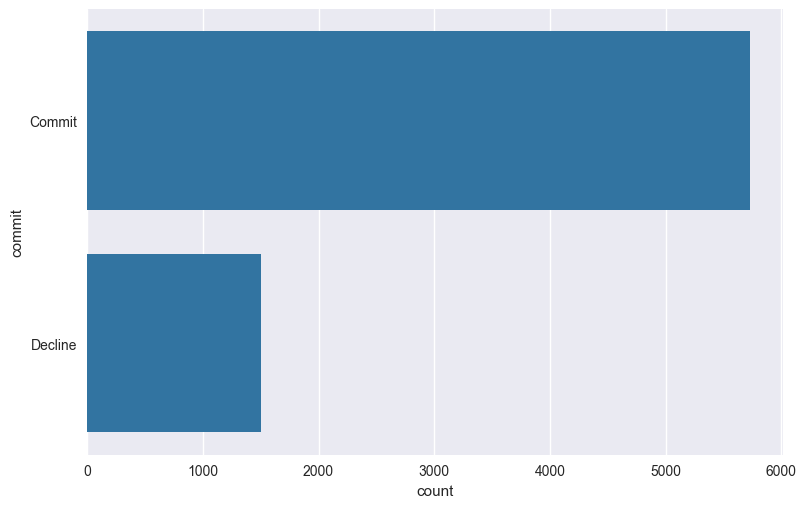

In [119]:
# countplot 'commit'

sns.countplot(investor_data, y= 'commit')
plt.show()


In [122]:
# tendency of lender to commit or decline

investor_data.groupby('investor').commit.value_counts()

investor         commit 
Bank of America  Commit     1247
                 Decline     231
Deutsche Bank    Commit      940
                 Decline     531
Goldman Sachs    Commit     1064
                 Decline     356
MUFG Union       Commit     1207
                 Decline     226
Wells Fargo      Commit     1272
                 Decline     159
Name: count, dtype: int64

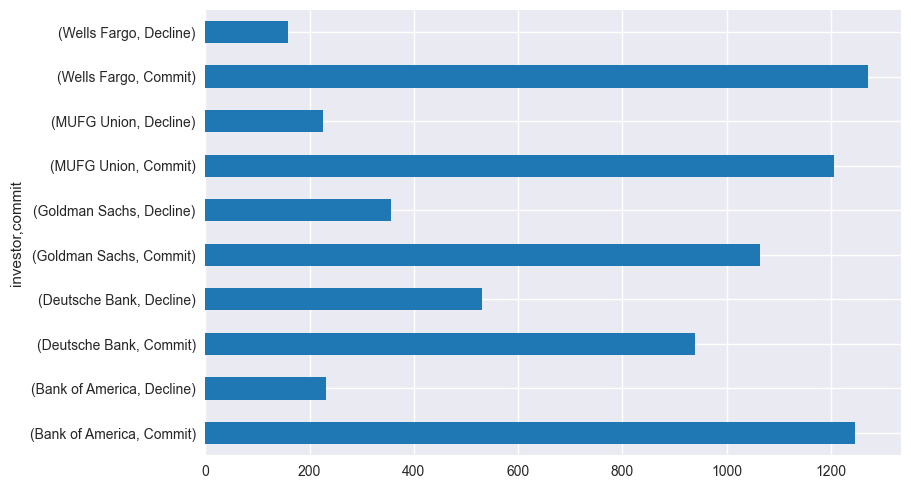

In [123]:
investor_data.groupby('investor').commit.value_counts().plot(kind='barh')
plt.show()

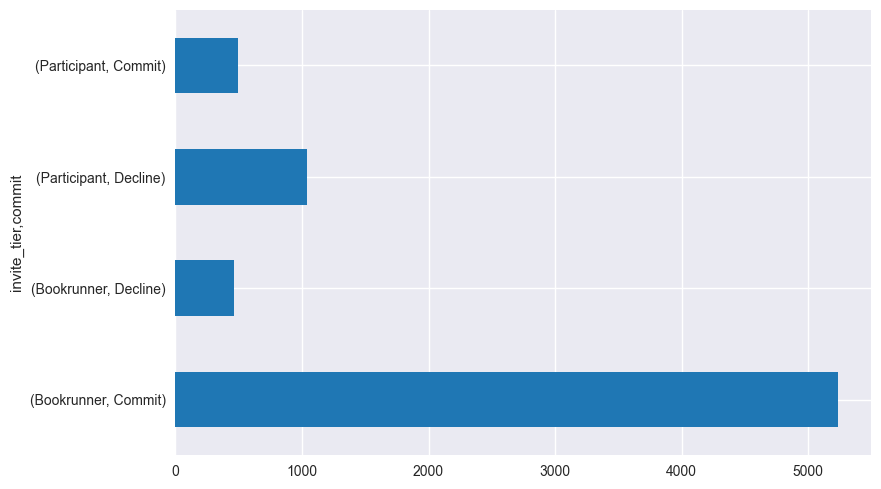

In [ ]:
# tendency of lender to commit or decline based on invite tier

investor_data.groupby('invite_tier').commit.value_counts().plot(kind='barh')
plt.show()

Super-strong way of pre-screening data:

> `.groupby()` + `value_counts()`!

e.g. # tendency of lender to commit or decline based on invite tier

# Feature Engineering

* Addtional features can make the algorithm a lot more powerful!
* Really need to user your head to think through how you can engineer new features from the data you've been given
* `Good features` come from `good questions`

In [132]:
# create 'tier_change' series indicating whether investors were promotoed or demoted since last funding round

investor_data['tier_change'] = np.where(
    investor_data['prior_tier'] == investor_data['invite_tier'], 'None', np.where(
        investor_data['prior_tier'] == 'Participant', 'Promoted', 'Demoted')    
    )

investor_data.head(3)

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_1111/944645344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investor_data['tier_change'] = np.where(


,investor,commit,deal_size,invite,rating,int_rate,covenants,total_fees,fee_share,prior_tier,invite_tier,tier_change
0,Goldman Sachs,Commit,300,40,2,Market,2,30,0.0,Participant,Bookrunner,Promoted
1,Deutsche Bank,Decline,1200,140,2,Market,2,115,20.1,Bookrunner,Participant,Demoted
2,Bank of America,Commit,900,130,3,Market,2,98,24.4,Bookrunner,Bookrunner,None


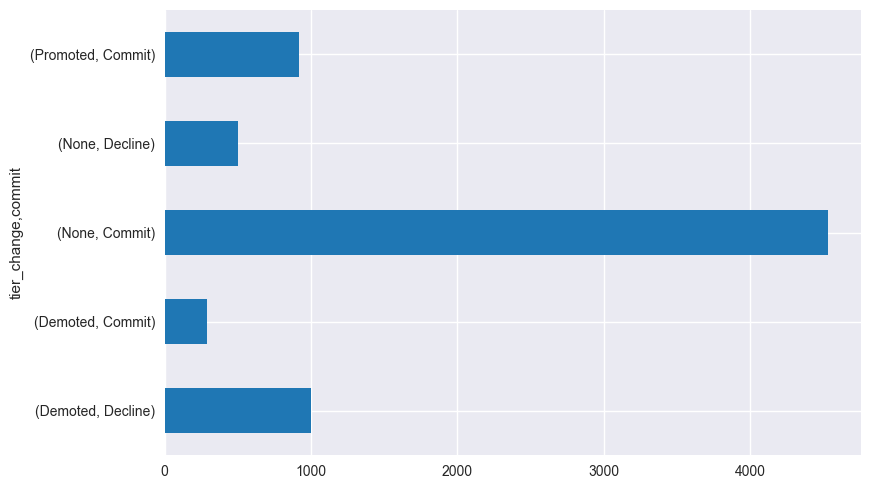

In [135]:
# commit value by tier change

investor_data.groupby('tier_change').commit.value_counts().plot(kind='barh')
plt.show()

In [ ]:
# Calculate the median values for Goldman Sachs grouped by 'commit'

investor_data[investor_data['investor'] == 'Goldman Sachs'].groupby('commit').median(numeric_only=True)

,deal_size,invite,rating,covenants,total_fees,fee_share
commit,,,,,,
Commit,1100.0,170.0,3.0,1.5,107.0,14.35
Decline,900.0,100.0,3.0,2.0,68.0,5.65


In [ ]:
# create series fee_percent (fee_share/total_fees)

investor_data['fee_percent'] = investor_data['fee_share'] / investor_data['total_fees']

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_1111/3561722452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investor_data['fee_percent'] = investor_data['fee_share'] / investor_data['total_fees']


In [158]:
# create series invite_percent (invite/deal_size)

investor_data['invite_percent'] = investor_data['invite'] / investor_data ['deal_size']

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_1111/2975660693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investor_data['invite_percent'] = investor_data['invite'] / investor_data ['deal_size']


In [159]:
investor_data.head(3)

,investor,commit,deal_size,invite,rating,int_rate,covenants,total_fees,fee_share,prior_tier,invite_tier,tier_change,fee_percent,invite_percent
0,Goldman Sachs,Commit,300,40,2,Market,2,30,0.0,Participant,Bookrunner,Promoted,0.000000,0.133333
1,Deutsche Bank,Decline,1200,140,2,Market,2,115,20.1,Bookrunner,Participant,Demoted,0.174783,0.116667
2,Bank of America,Commit,900,130,3,Market,2,98,24.4,Bookrunner,Bookrunner,None,0.248980,0.144444


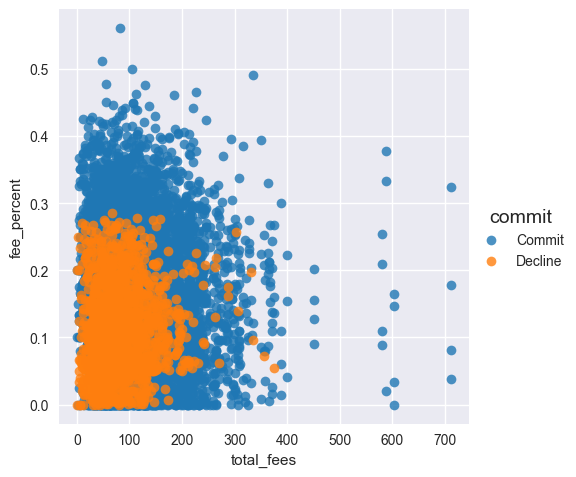

In [160]:
# plot relationships of numerical variables

# fees paid by issuer and share of those fees captured by the investor

sns.lmplot(
    x= 'total_fees', # numeric var 1
    y= 'fee_percent', # numeric var 2
    hue= 'commit', # how to change colour, target variable!
    data= investor_data,
    fit_reg= False
)
plt.show()

Analysis

* investors getting more than 30% of fees never decline
* investors rarely decline transactions where fees exceed $200M
* investors are more likely to commit to big fee-payers where they can collect a large percent of the fees

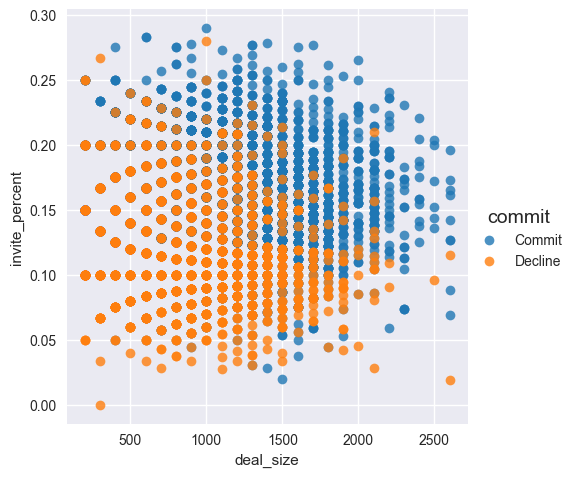

In [163]:
# deal_size and invite_percent

# how investors react to deals of various sizes and commiting to contributing larger or smaller shares of these amounts

sns.lmplot(
    x='deal_size',
    y='invite_percent',
    data=investor_data,
    hue='commit',
    fit_reg=False
)
plt.show()

# Analysis

1. some banks are more selective than others declining a greater proportion of transactions
2. anomalous for promotoed investors to decline invitation
3. demoted investors usually decline invitation
4. participants are more likely to decline than bookrunners
5. investors are more likely to commit to transactions for issuers who pay a large amnount of IB fees
6. investors are more likely to commit to transactions when they historically have earned a large share of the issuers total fees
7. investors are more likely to commit to commit to larger deals where they commit to a larger portion of these deals